<a href="https://colab.research.google.com/github/rickyprimay/klastering_kmeans/blob/main/with_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import time
import itertools

In [2]:
datasetPath = "./dataku.txt"
dataset = np.loadtxt(datasetPath, delimiter=" ")
k = 2
iterationCounter = 0
input = dataset

def initCentroid(dataIn, k):
    result = dataIn[np.random.choice(dataIn.shape[0], k, replace=False)]
    return result

In [3]:
def plotClusterResult(listClusterMembers, centroid, iteration, converged):
    n = listClusterMembers.__len__()
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    plt.figure("result")
    plt.clf()
    plt.title("iteration-" +iteration)
    marker = itertools.cycle((".", "*", "^", "x", "+"))
    for i in range(n):
        col = next(color)
        memberCluster = np.asmatrix(listClusterMembers[i])
        plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
                    marker=marker.__next__(), s=100, c=col, label="klaster-"+str(i+1))
    for i in range(n):
        plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__()
                    , c=col, label="centroid-" + str(i+1))
    if(converged == 0):
        plt.legend()
        plt.ion()
        plt.show()
        plt.pause(0.1)
    if(converged == 1):
        plt.legend()
        plt.show(block=True)

In [4]:
def kMeans(data, centroidInit):
    nCluster = k
    global iterationCounter
    centroidInit = np.matrix(centroidInit)
    while(True):
        iterationCounter +=1
        euclideanMatrixAllCluster = np.ndarray(shape=(data.shape[0], 0))
        for i in range(0, nCluster):
            centroidRepeated = np.repeat(centroidInit[i,:], data.shape[0], axis=0)
            deltaMatrix = abs(np.subtract(data,centroidRepeated))
            euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
            euclideanMatrixAllCluster = \
                np.concatenate((euclideanMatrixAllCluster, euclideanMatrix), axis=1)
        clusterMatrix = np.ravel(np.argmin(np.matrix(euclideanMatrixAllCluster), axis=1))
        listClusterMember = [[] for i in range(k)]
        for i in range(0, data.shape[0]):#assign data to cluster regarding cluster matrix
            listClusterMember[clusterMatrix[i]].append(data[i, :])
        newCentroid = np.ndarray(shape=(0, centroidInit.shape[1]))
        for i in range(0,nCluster):
            memberCluster = np.asmatrix(listClusterMember[i])
            centroidCluster = memberCluster.mean(axis=0)
            newCentroid = np.concatenate((newCentroid, centroidCluster), axis=0)
        print("iter: ", iterationCounter)
        print("centroid: ", newCentroid)
        if((centroidInit == newCentroid).all()):
            break
        centroidInit = newCentroid
        plotClusterResult(listClusterMember, centroidInit, str(iterationCounter), 0)
        time.sleep(1) #diberi jeda 1 detik agak hasil plot klaster nyaman dilihat
    return listClusterMember, centroidInit

iter:  1
centroid:  [[-10.75039298   4.42113333]
 [  1.36504402  -0.65164548]]


<ipython-input-3-328aeb48ff12>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
<ipython-input-3-328aeb48ff12>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__()


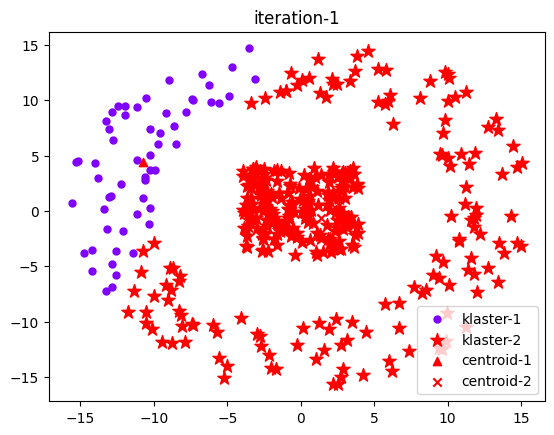

iter:  2
centroid:  [[-9.86970506  2.61233165]
 [ 1.97864299 -0.55415576]]


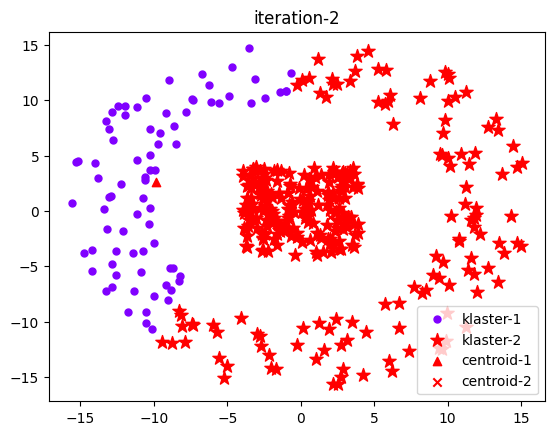

iter:  3
centroid:  [[-9.53024066  1.21215495]
 [ 2.33880129 -0.26477638]]


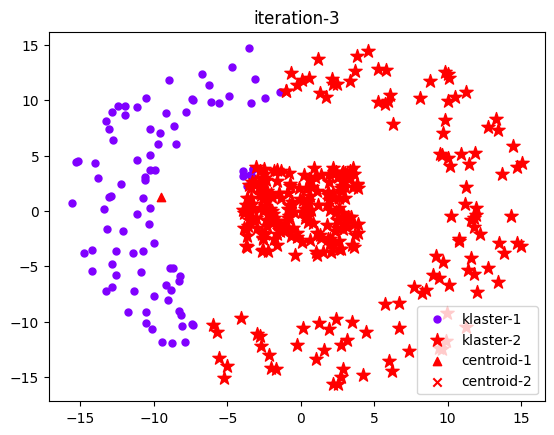

iter:  4
centroid:  [[-9.14865051  0.68020808]
 [ 2.52875116 -0.1290711 ]]


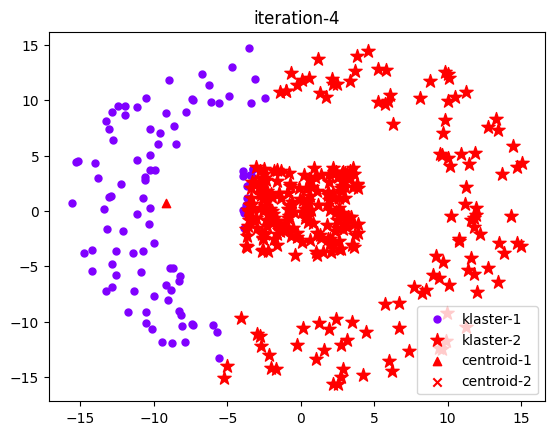

iter:  5
centroid:  [[-8.36403966  0.1149319 ]
 [ 2.9072757   0.05337359]]


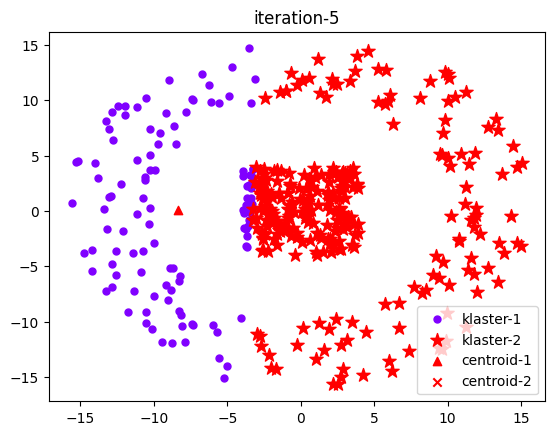

iter:  6
centroid:  [[-7.89759921  0.10620709]
 [ 3.14444249  0.05495201]]


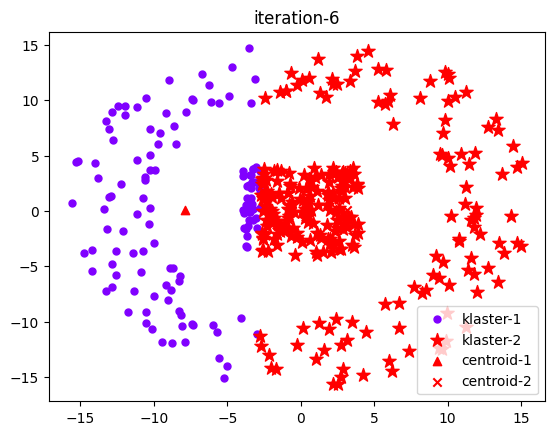

iter:  7
centroid:  [[-7.04973709  0.07451457]
 [ 3.69457028  0.06923092]]


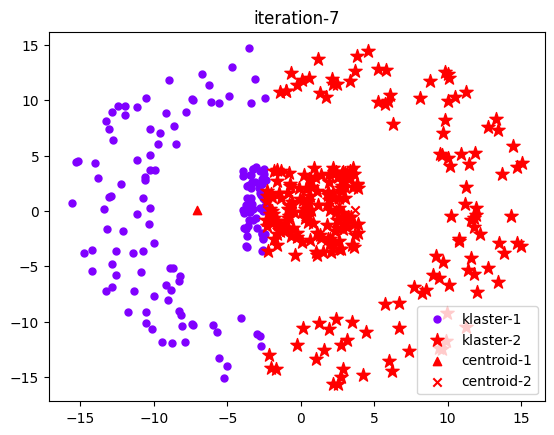

iter:  8
centroid:  [[-6.5208213  -0.09418876]
 [ 4.14483333  0.19224286]]


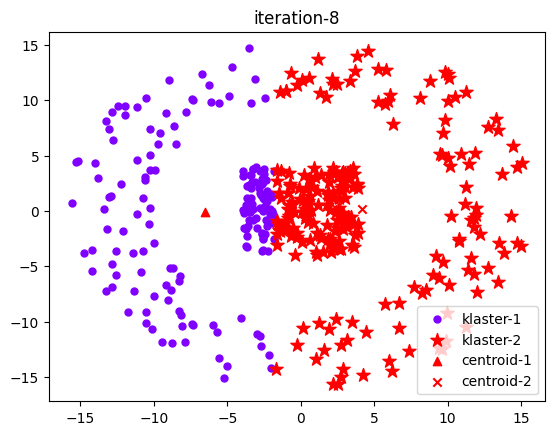

iter:  9
centroid:  [[-6.16379066 -0.1622022 ]
 [ 4.48278716  0.2661055 ]]


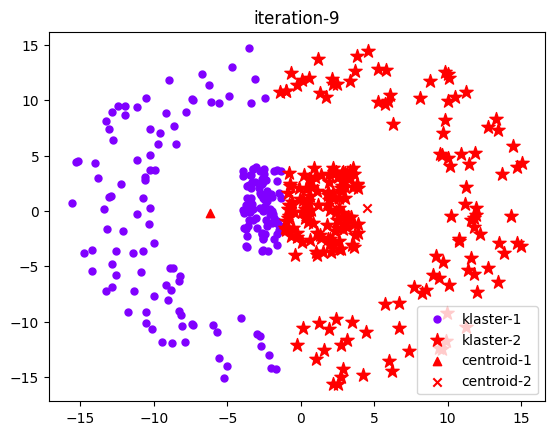

iter:  10
centroid:  [[-6.00015106 -0.12449734]
 [ 4.63899104  0.24479104]]


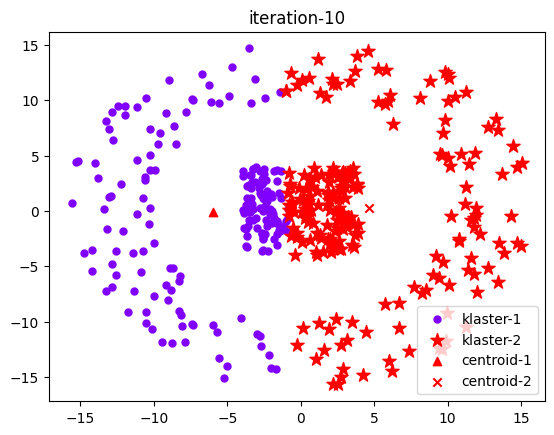

iter:  11
centroid:  [[-5.8383134  -0.12040515]
 [ 4.79645874  0.2516932 ]]


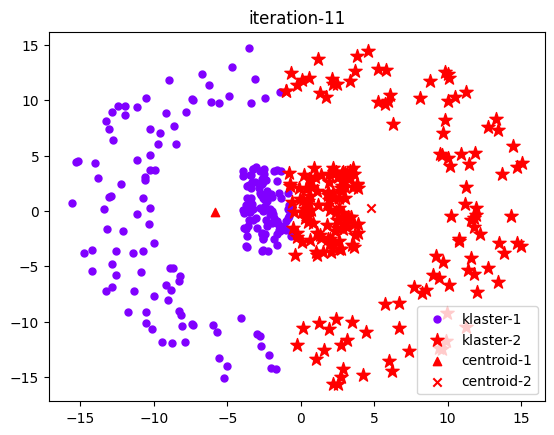

iter:  12
centroid:  [[-5.60897833 -0.05130148]
 [ 5.04599137  0.19748426]]


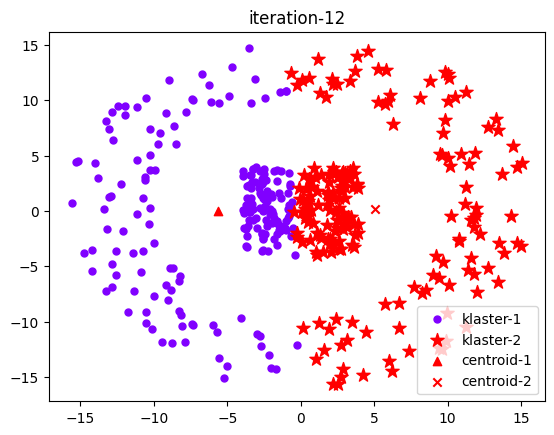

iter:  13
centroid:  [[-5.50860966 -0.01145459]
 [ 5.15917047  0.15990311]]


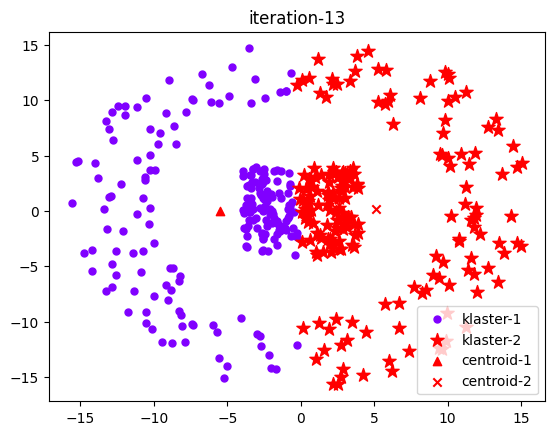

iter:  14
centroid:  [[-5.50860966 -0.01145459]
 [ 5.15917047  0.15990311]]


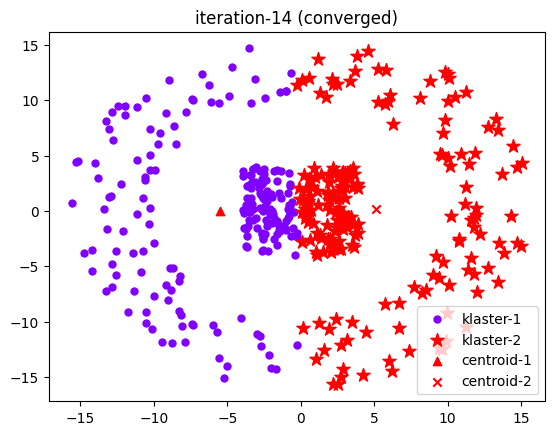

In [5]:
centroidInit = initCentroid(input, k)
clusterResults, centroid = kMeans(input, centroidInit)
plotClusterResult(clusterResults, centroid, str(iterationCounter) + " (converged)", 1)